In [1]:
################### Build dataset ###################
import sys
from pathlib import Path
import torch

# package_root = Path('/home/goose/projects/deeplearning/deep_learning_tools')
package_root = Path('/home/gustaf/projects/deeplearning/deep_learning_tools')
sys.path.append(str(package_root))

from src import prepare_datasets

# parameters
dataset_name = 'FashionMNIST'
data_root = '/home/gustaf/projects/deeplearning/data'
download_data = True
normalize_data = False

# prepare datasets
trainset, valset = prepare_datasets(dataset_name, data_root, normalize=normalize_data)

In [2]:
################### Build network ###################
import torch.nn as nn
from torch.optim import Adadelta, Adam, SGD
from torch.optim.lr_scheduler import StepLR
from src import ModelTrainer
from src import accuracy, precision

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)

        return x
    
# initialize model
model = Net(input_size=28*28, output_size=10)


#################### Build optimizer and scheduler ####################
# initialize optimizer
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.75)


#################### Build trainer ####################
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=512,  # 128
    verbose=True,             # controls training progress logs
    save_metrics=False,        # controls saving of metrics visualization
    early_stopping_patience=3,
    early_stopping_delta=0.1,
    logger_type="wandb",
    wandb_project="fashion-mnist",
    wandb_entity="futuregoose",
    sweep=True
)


#################### Train model ####################
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=2
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: evilgoosecode (futuregoose). Use `wandb login --relogin` to force relogin


wandb: ERROR Problem finishing run



Training interrupted. Cleaning up...
Error during training: 'ZMQDisplayPublisher' object has no attribute '_orig_publish'

Training interrupted. Cleaning up...
Model state already saved as checkpoint.pt.


KeyboardInterrupt: Training interrupted by user.

In [ ]:
################### Build network ###################
import torch.nn as nn
from torch.optim import Adadelta, Adam, SGD
from torch.optim.lr_scheduler import StepLR
from src import ModelTrainer
from src import accuracy, precision

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)

        return x
    
# initialize model
model = Net(input_size=28*28, output_size=10)


#################### Build optimizer and scheduler ####################
# initialize optimizer
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.75)


#################### Build trainer ####################
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=512,  # 128
    verbose=True,             # controls training progress logs
    save_metrics=False,        # controls saving of metrics visualization
    early_stopping_patience=3,
    early_stopping_delta=0.00001,
    logger_type="wandb",
    wandb_project="fashion-mnist",
    wandb_entity="futuregoose",
    sweep=True
)


#################### Train model ####################
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=2
)

Create sweep with ID: l4akpum4
Sweep URL: https://wandb.ai/futuregoose/fashion-mnist/sweeps/l4akpum4
sweep url: https://wandb.ai/futuregoose/fashion-mnist/sweeps/l4akpum4

starting sweep...
running 20 trials...


Run 5bb16axy errored:
Traceback (most recent call last):
  File "/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "/home/gustaf/projects/deeplearning/deep_learning_tools/src/sweeps/sweep.py", line 122, in sweep_train
    print(f"\nrun {run.name} - batch_size: {config.batch_size}, lr: {config.learning_rate:.5f}, optimizer: {config.optimizer}")
  File "/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages/wandb/sdk/lib/preinit.py", line 27, in __getattr__
    raise wandb.Error(f"You must call wandb.init() before {self._name}.{key}")
wandb.errors.errors.Error: You must call wandb.init() before wandb.config.batch_size



wandb error during sweep run: You must call wandb.init() before wandb.config.batch_size


Run 0mw435jv errored:
Traceback (most recent call last):
  File "/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "/home/gustaf/projects/deeplearning/deep_learning_tools/src/sweeps/sweep.py", line 122, in sweep_train
    print(f"\nrun {run.name} - batch_size: {config.batch_size}, lr: {config.learning_rate:.5f}, optimizer: {config.optimizer}")
  File "/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages/wandb/sdk/lib/preinit.py", line 27, in __getattr__
    raise wandb.Error(f"You must call wandb.init() before {self._name}.{key}")
wandb.errors.errors.Error: You must call wandb.init() before wandb.config.batch_size



wandb error during sweep run: You must call wandb.init() before wandb.config.batch_size


Run ugafr6w0 errored:
Traceback (most recent call last):
  File "/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages/wandb/agents/pyagent.py", line 306, in _run_job
    self._function()
  File "/home/gustaf/projects/deeplearning/deep_learning_tools/src/sweeps/sweep.py", line 122, in sweep_train
    print(f"\nrun {run.name} - batch_size: {config.batch_size}, lr: {config.learning_rate:.5f}, optimizer: {config.optimizer}")
  File "/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages/wandb/sdk/lib/preinit.py", line 27, in __getattr__
    raise wandb.Error(f"You must call wandb.init() before {self._name}.{key}")
wandb.errors.errors.Error: You must call wandb.init() before wandb.config.batch_size

Detected 3 failed runs in the first 60 seconds, killing sweep.


wandb error during sweep run: You must call wandb.init() before wandb.config.batch_size

sweep completed successfully!
view results at: https://wandb.ai/futuregoose/fashion-mnist/sweeps/l4akpum4

tip: in the sweep page, look at the parallel coordinates plot to find the best parameters
the best parameters will be those that minimize val_loss and maximize val_acc


In [ ]:
import wandb

wandb.login()

# define the sweep configuration
sweep_config = {
    'method': 'random',
    'metric': {
        'goal': 'minimize',
        'name': 'loss'
    },
    'parameters': {
        'batch_size': {
            'distribution': 'q_log_uniform_values',
            'min': 32,
            'max': 256,
            'q': 8
        },
        'dropout': {
            'values': [0.3, 0.4, 0.5]
        },
        'epochs': {
            'value': 1
        },
        'fc_layer_size': {
            'values': [128, 256, 512]
        },
        'learning_rate': {
            'distribution': 'uniform',
            'min': 0,
            'max': 0.1
        },
        'optimizer': {
            'values': ['adam', 'sgd']
        }
    }
}


sweep_id = wandb.sweep(sweep_config, project="pytorch-sweeps-demo", entity="futuregoose")

import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        loader = build_dataset(config.batch_size)
        network = build_network(config.fc_layer_size, config.dropout)
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)

        for epoch in range(config.epochs):
            avg_loss = train_epoch(network, loader, optimizer)
            wandb.log({"loss": avg_loss, "epoch": epoch})


def build_dataset(batch_size):

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3081,))])
    # download MNIST training dataset
    dataset = datasets.MNIST(".", train=True, download=True,
                             transform=transform)
    sub_dataset = torch.utils.data.Subset(
        dataset, indices=range(0, len(dataset), 5))
    loader = torch.utils.data.DataLoader(sub_dataset, batch_size=batch_size)

    return loader


def build_network(fc_layer_size, dropout):
    network = nn.Sequential(  # fully-connected, single hidden layer
        nn.Flatten(),
        nn.Linear(784, fc_layer_size), nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(fc_layer_size, 10),
        nn.LogSoftmax(dim=1))

    return network.to(device)


def build_optimizer(model, optimizer_name, lr):
    if optimizer_name == "adam":
        return torch.optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "sgd":
        return torch.optim.SGD(model.parameters(), lr=lr)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")


def train_epoch(network, loader, optimizer):
    cumu_loss = 0
    for _, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        # ➡ Forward pass
        loss = F.nll_loss(network(data), target)
        cumu_loss += loss.item()

        # ⬅ Backward pass + weight update
        loss.backward()
        optimizer.step()

        wandb.log({"batch loss": loss.item()})

    return cumu_loss / len(loader)

wandb.agent(sweep_id, train, count=5)

In [ ]:
import wandb
import yaml
from src import ModelTrainer
import torch.nn as nn
from torch.utils.data import DataLoader

# load sweep configuration
with open('/home/gustaf/projects/deeplearning/deep_learning_tools/src/sweeps/config.yml') as file:  # load the config file
    sweep_config = yaml.safe_load(file)

def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        # initialize model, criterion, and data loaders
        model = model # define your model here
        criterion = nn.CrossEntropyLoss()
        train_loader = DataLoader(trainset, batch_size=config.batch_size, shuffle=True)
        val_loader = DataLoader(valset, batch_size=config.batch_size, shuffle=False)
        # initialize ModelTrainer
        trainer = ModelTrainer(model=model, device=device, loss_fn=criterion,
                              batch_size=config.batch_size, learning_rate=config.learning_rate,
                              optimizer_name=config.optimizer, epochs=config.epochs)
        # train the model
        trainer.train(train_loader, val_loader)
        # log metrics
        wandb.log({'train_loss': trainer.metrics_history['train_loss'][-1],
                   'val_loss': trainer.metrics_history['val_loss'][-1]})

# initialize W&B sweep
sweep_id = wandb.sweep(sweep_config, project='fashion-mnist')
wandb.agent(sweep_id, train, count=10)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
403 response executing GraphQL.
{"errors":[{"message":"permission denied","path":["upsertSweep"],"extensions":{"code":"PERMISSION_ERROR"}}],"data":{"upsertSweep":null}}
wandb: ERROR Error while calling W&B API: permission denied (<Response [403]>)


UsageError: permission denied

In [ ]:
import wandb

wandb.login()

# define the sweep configuration
sweep_config = {
    'method': 'random',
    'metric': {
        'goal': 'minimize',
        'name': 'loss'
    },
    'parameters': {
        'batch_size': {
            'distribution': 'q_log_uniform_values',
            'min': 32,
            'max': 256,
            'q': 8
        },
        'dropout': {
            'values': [0.3, 0.4, 0.5]
        },
        'epochs': {
            'value': 1
        },
        'fc_layer_size': {
            'values': [128, 256, 512]
        },
        'learning_rate': {
            'distribution': 'uniform',
            'min': 0,
            'max': 0.1
        },
        'optimizer': {
            'values': ['adam', 'sgd']
        }
    }
}


sweep_id = wandb.sweep(sweep_config, project="pytorch-sweeps-demo", entity="futuregoose")

import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        loader = build_dataset(config.batch_size)
        network = build_network(config.fc_layer_size, config.dropout)
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)

        for epoch in range(config.epochs):
            avg_loss = train_epoch(network, loader, optimizer)
            wandb.log({"loss": avg_loss, "epoch": epoch})


def build_dataset(batch_size):

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3081,))])
    # download MNIST training dataset
    dataset = datasets.MNIST(".", train=True, download=True,
                             transform=transform)
    sub_dataset = torch.utils.data.Subset(
        dataset, indices=range(0, len(dataset), 5))
    loader = torch.utils.data.DataLoader(sub_dataset, batch_size=batch_size)

    return loader


def build_network(fc_layer_size, dropout):
    network = nn.Sequential(  # fully-connected, single hidden layer
        nn.Flatten(),
        nn.Linear(784, fc_layer_size), nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(fc_layer_size, 10),
        nn.LogSoftmax(dim=1))

    return network.to(device)


def build_optimizer(model, optimizer_name, lr):
    if optimizer_name == "adam":
        return torch.optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "sgd":
        return torch.optim.SGD(model.parameters(), lr=lr)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")


def train_epoch(network, loader, optimizer):
    cumu_loss = 0
    for _, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        # ➡ Forward pass
        loss = F.nll_loss(network(data), target)
        cumu_loss += loss.item()

        # ⬅ Backward pass + weight update
        loss.backward()
        optimizer.step()

        wandb.log({"batch loss": loss.item()})

    return cumu_loss / len(loader)

wandb.agent(sweep_id, train, count=5)

In [ ]:
def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        loader = build_dataset(config.batch_size)
        network = build_network(config.fc_layer_size, config.dropout)
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)

        for epoch in range(config.epochs):
            avg_loss = train_epoch(network, loader, optimizer)
            wandb.log({"loss": avg_loss, "epoch": epoch})

In [7]:
import wandb

wandb.login()

# define the sweep configuration
sweep_config = {
    'method': 'random',
    'metric': {
        'goal': 'minimize',
        'name': 'loss'
    },
    'parameters': {
        'batch_size': {
            'distribution': 'q_log_uniform_values',
            'min': 32,
            'max': 256,
            'q': 8
        },
        'dropout': {
            'values': [0.3, 0.4, 0.5]
        },
        'epochs': {
            'value': 1
        },
        'fc_layer_size': {
            'values': [128, 256, 512]
        },
        'learning_rate': {
            'distribution': 'uniform',
            'min': 0,
            'max': 0.1
        },
        'optimizer': {
            'values': ['adam', 'sgd']
        }
    }
}


sweep_id = wandb.sweep(sweep_config, project="pytorch-sweeps-demo", entity="futuregoose")

import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        loader = build_dataset(config.batch_size)
        network = build_network(config.fc_layer_size, config.dropout)
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)

        for epoch in range(config.epochs):
            avg_loss = train_epoch(network, loader, optimizer)
            wandb.log({"loss": avg_loss, "epoch": epoch})


def build_dataset(batch_size):

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3081,))])
    # download MNIST training dataset
    dataset = datasets.MNIST(".", train=True, download=True,
                             transform=transform)
    sub_dataset = torch.utils.data.Subset(
        dataset, indices=range(0, len(dataset), 5))
    loader = torch.utils.data.DataLoader(sub_dataset, batch_size=batch_size)

    return loader


def build_network(fc_layer_size, dropout):
    network = nn.Sequential(  # fully-connected, single hidden layer
        nn.Flatten(),
        nn.Linear(784, fc_layer_size), nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(fc_layer_size, 10),
        nn.LogSoftmax(dim=1))

    return network.to(device)


def build_optimizer(model, optimizer_name, lr):
    if optimizer_name == "adam":
        return torch.optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "sgd":
        return torch.optim.SGD(model.parameters(), lr=lr)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")


def train_epoch(network, loader, optimizer):
    cumu_loss = 0
    for _, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        # ➡ Forward pass
        loss = F.nll_loss(network(data), target)
        cumu_loss += loss.item()

        # ⬅ Backward pass + weight update
        loss.backward()
        optimizer.step()

        wandb.log({"batch loss": loss.item()})

    return cumu_loss / len(loader)

wandb.agent(sweep_id, train, count=5)

Create sweep with ID: frajzskh
Sweep URL: https://wandb.ai/futuregoose/pytorch-sweeps-demo/sweeps/frajzskh


wandb: Agent Starting Run: rgclbpa2 with config:
wandb: 	batch_size: 48
wandb: 	dropout: 0.3
wandb: 	epochs: 1
wandb: 	fc_layer_size: 128
wandb: 	learning_rate: 0.028798781971702492
wandb: 	optimizer: sgd


batch loss,█▇▇▇▆▄▃▄▄▂▃▃▃▂▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁
epoch,▁
loss,▁
batch loss,0.29566
epoch,0
loss,0.74371


wandb: Agent Starting Run: jahgqfie with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.3
wandb: 	epochs: 1
wandb: 	fc_layer_size: 128
wandb: 	learning_rate: 0.06914710837192668
wandb: 	optimizer: adam


batch loss,█▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁
loss,▁
batch loss,4.80398
epoch,0
loss,2.43515


wandb: Agent Starting Run: pfrbhpuj with config:
wandb: 	batch_size: 56
wandb: 	dropout: 0.4
wandb: 	epochs: 1
wandb: 	fc_layer_size: 256
wandb: 	learning_rate: 0.03881186585318245
wandb: 	optimizer: adam


batch loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁
loss,▁
batch loss,0.74863
epoch,0
loss,1.87063


wandb: Agent Starting Run: 8molpwsj with config:
wandb: 	batch_size: 256
wandb: 	dropout: 0.5
wandb: 	epochs: 1
wandb: 	fc_layer_size: 256
wandb: 	learning_rate: 0.022958168412937043
wandb: 	optimizer: sgd


batch loss,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▃▂▂▁▁▂▁
epoch,▁
loss,▁
batch loss,0.96589
epoch,0
loss,1.6026


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: kunaa87j with config:
wandb: 	batch_size: 48
wandb: 	dropout: 0.3
wandb: 	epochs: 1
wandb: 	fc_layer_size: 256
wandb: 	learning_rate: 0.017275553545050937
wandb: 	optimizer: sgd


batch loss,█▇▇▆▅▄▅▄▄▄▃▃▃▃▂▃▃▂▃▃▃▂▂▂▃▂▃▂▂▂▂▂▂▂▂▁▂▂▂▁
epoch,▁
loss,▁
batch loss,0.3838
epoch,0
loss,0.83915


In [ ]:
import wandb
import yaml
from src import ModelTrainer
import torch.nn as nn
from torch.utils.data import DataLoader

# load sweep configuration
with open('/home/gustaf/projects/deeplearning/deep_learning_tools/src/sweeps/config.yml') as file:  # load the config file
    sweep_config = yaml.safe_load(file)

def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        # initialize model, criterion, and data loaders
        model = model # define your model here
        criterion = nn.CrossEntropyLoss()
        train_loader = DataLoader(trainset, batch_size=config.batch_size, shuffle=True)
        val_loader = DataLoader(valset, batch_size=config.batch_size, shuffle=False)
        # initialize ModelTrainer
        trainer = ModelTrainer(model=model, device=device, loss_fn=criterion,
                              batch_size=config.batch_size, learning_rate=config.learning_rate,
                              optimizer_name=config.optimizer, epochs=config.epochs)
        # train the model
        trainer.train(train_loader, val_loader)
        # log metrics
        wandb.log({'train_loss': trainer.metrics_history['train_loss'][-1],
                   'val_loss': trainer.metrics_history['val_loss'][-1]})

# initialize W&B sweep
sweep_id = wandb.sweep(sweep_config, project='fashion-mnist')
wandb.agent(sweep_id, train, count=10)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
403 response executing GraphQL.
{"errors":[{"message":"permission denied","path":["upsertSweep"],"extensions":{"code":"PERMISSION_ERROR"}}],"data":{"upsertSweep":null}}
wandb: ERROR Error while calling W&B API: permission denied (<Response [403]>)


UsageError: permission denied

In [ ]:
from torchvision import datasets, transforms
import torch
def calculate_mean_std(dataset):
    """calculate mean and standard deviation of a dataset"""
    mean = 0.0
    std = 0.0
    total_images = len(dataset)

    for img, _ in dataset:
        mean += img.mean()
        std += img.std()

    mean /= total_images
    std /= total_images

    return mean.item(), std.item()

mean = 0.28604063391685486
std = 0.3204546272754669

# normalization transform
transform = transforms.Compose([transforms.ToTensor()])

# load training and test datasets with normalization
trainset = datasets.FashionMNIST(root='/home/gustaf/projects/deeplearning/data', train=True, download=True, transform=transform)
valset = datasets.FashionMNIST(root='/home/gustaf/projects/deeplearning/data', train=False, download=True, transform=transform)

# mean, std = calculate_mean_std(trainset)
# print(f'Before normalization: mean: {mean}, std: {std}')

# # normalization transform
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

# # load training and test datasets with normalization
# trainset = datasets.FashionMNIST(root='/home/gustaf/projects/deeplearning/data', train=True, download=True, transform=transform)
# valset = datasets.FashionMNIST(root='/home/gustaf/projects/deeplearning/data', train=False, download=True, transform=transform)

# mean, std = calculate_mean_std(trainset)
# print(f'After normalization: mean: {mean}, std: {std}')

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')


import torch
import torch.nn as nn
from torch.optim import Adadelta, Adam, SGD
from torch.optim.lr_scheduler import StepLR
import sys
from pathlib import Path

# package_root = Path('/home/goose/projects/deeplearning/deep_learning_tools')
package_root = Path('/home/gustaf/projects/deeplearning/deep_learning_tools')
sys.path.append(str(package_root))

from src import ModelTrainer
from src import accuracy, precision


# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        # conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)  # padding='same'
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(32)  # batch norm after first conv
        self.bn2 = nn.BatchNorm2d(64)  # batch norm after second conv
        self.bn3 = nn.BatchNorm2d(128)  # batch norm after third conv
        self.bn4 = nn.BatchNorm2d(256)  # batch norm after fourth conv
        # size calculation
        # 28x28 → conv1: 28x28
        # 28x28 → conv2: 28x28 → pool: 14x14
        # 14x14 → conv3: 14x14 → pool: 7x7
        # 7x7 → conv4: 7x7 → pool: 3x3
        # 3x3 → flatten: 3 * 3 * 256 = 2304
        flattened_size = 2304

        # fully connected layers
        self.flatten = nn.Flatten()
        
        # self.fc = nn.Linear(flattened_size, 32)
        self.fc = nn.Linear(input_size, output_size)  # TEST

        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        # # conv1 + batch norm + pooling
        # x = self.bn1(self.relu(self.conv1(x)))
        # # conv2 + batch norm + pooling
        # x = self.pool(self.bn2(self.relu(self.conv2(x))))
        # # conv3 + batch norm + pooling
        # x = self.pool(self.bn3(self.relu(self.conv3(x))))
        # # conv4 + batch norm + pooling
        # x = self.pool(self.bn4(self.relu(self.conv4(x))))
        # x = self.dropout1(x)

        # flatten and fully connected layer
        x = self.flatten(x)
        x = self.fc(x)  # TEST

        # x = self.fc(self.relu(x))
        # x = self.dropout2(x)
        # x = self.fc2(self.relu(x))
        # x = self.fc3(x)

        return x

# initialize model
model = Net(input_size=28*28, output_size=10)
# initialize optimizer
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.75)

# initialize trainer
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=512,  # 128
    verbose=True,             # controls training progress logs
    save_metrics=False,        # controls saving of metrics visualization
    early_stopping_patience=3,
    early_stopping_delta=0.00001,
    logger_type="file",
    wandb_project="fashion-mnist",
    wandb_entity="futuregoose"
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=5
)

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adadelta, Adam, SGD
from torch.optim.lr_scheduler import StepLR
import sys
from pathlib import Path

# package_root = Path('/home/goose/projects/deeplearning/deep_learning_tools')
package_root = Path('/home/gustaf/projects/deeplearning/deep_learning_tools')
sys.path.append(str(package_root))

from src import ModelTrainer
from src import accuracy, precision


# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        # conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)  # padding='same'
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(32)  # batch norm after first conv
        self.bn2 = nn.BatchNorm2d(64)  # batch norm after second conv
        self.bn3 = nn.BatchNorm2d(128)  # batch norm after third conv
        self.bn4 = nn.BatchNorm2d(256)  # batch norm after fourth conv
        # size calculation
        # 28x28 → conv1: 28x28
        # 28x28 → conv2: 28x28 → pool: 14x14
        # 14x14 → conv3: 14x14 → pool: 7x7
        # 7x7 → conv4: 7x7 → pool: 3x3
        # 3x3 → flatten: 3 * 3 * 256 = 2304
        flattened_size = 2304

        # fully connected layers
        self.flatten = nn.Flatten()
        
        # self.fc = nn.Linear(flattened_size, 32)
        self.fc = nn.Linear(input_size, output_size)  # TEST

        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        # # conv1 + batch norm + pooling
        # x = self.bn1(self.relu(self.conv1(x)))
        # # conv2 + batch norm + pooling
        # x = self.pool(self.bn2(self.relu(self.conv2(x))))
        # # conv3 + batch norm + pooling
        # x = self.pool(self.bn3(self.relu(self.conv3(x))))
        # # conv4 + batch norm + pooling
        # x = self.pool(self.bn4(self.relu(self.conv4(x))))
        # x = self.dropout1(x)

        # flatten and fully connected layer
        x = self.flatten(x)
        x = self.fc(x)  # TEST

        # x = self.fc(self.relu(x))
        # x = self.dropout2(x)
        # x = self.fc2(self.relu(x))
        # x = self.fc3(x)

        return x

# initialize model
model = Net(input_size=28*28, output_size=10)
# initialize optimizer
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.75)

# initialize trainer
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=512,  # 128
    verbose=True,             # controls training progress logs
    save_metrics=False,        # controls saving of metrics visualization
    early_stopping_patience=3,
    early_stopping_delta=0.00001,
    logger_type="wandb",
    wandb_project="fashion-mnist",
    wandb_entity="futuregoose",
    sweep=False
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=5
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: evilgoosecode (futuregoose). Use `wandb login --relogin` to force relogin



Training interrupted. Cleaning up...


batch_loss,█▆▅▅▅▄▄▃▃▃▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch_loss,0.58701
epoch,1


Model state already saved as checkpoint.pt.
Training was manually interrupted.


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adadelta, Adam, SGD
from torch.optim.lr_scheduler import StepLR
import sys
from pathlib import Path

# package_root = Path('/home/goose/projects/deeplearning/deep_learning_tools')
package_root = Path('/home/gustaf/projects/deeplearning/deep_learning_tools')
sys.path.append(str(package_root))

from src import ModelTrainer
from src import accuracy, precision


# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        # conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)  # padding='same'
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(32)  # batch norm after first conv
        self.bn2 = nn.BatchNorm2d(64)  # batch norm after second conv
        self.bn3 = nn.BatchNorm2d(128)  # batch norm after third conv
        self.bn4 = nn.BatchNorm2d(256)  # batch norm after fourth conv
        # size calculation
        # 28x28 → conv1: 28x28
        # 28x28 → conv2: 28x28 → pool: 14x14
        # 14x14 → conv3: 14x14 → pool: 7x7
        # 7x7 → conv4: 7x7 → pool: 3x3
        # 3x3 → flatten: 3 * 3 * 256 = 2304
        flattened_size = 2304

        # fully connected layers
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(flattened_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        # conv1 + batch norm + pooling
        x = self.bn1(self.relu(self.conv1(x)))
        # conv2 + batch norm + pooling
        x = self.pool(self.bn2(self.relu(self.conv2(x))))
        # conv3 + batch norm + pooling
        x = self.pool(self.bn3(self.relu(self.conv3(x))))
        # conv4 + batch norm + pooling
        x = self.pool(self.bn4(self.relu(self.conv4(x))))
        x = self.dropout1(x)

        # flatten and fully connected layer
        x = self.flatten(x)
        x = self.fc(self.relu(x))
        x = self.dropout2(x)
        x = self.fc2(self.relu(x))
        x = self.fc3(x)

        return x

# initialize model
model = Net(input_size=28*28, output_size=10)
# initialize optimizer
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.75)

# initialize trainer
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=128,
    verbose=True,             # controls training progress logs
    save_metrics=False,        # controls saving of metrics visualization
    early_stopping_patience=3,
    early_stopping_delta=0.00001,
    logger_type="wandb",
    wandb_project="fashion-mnist",
    wandb_entity="futuregoose"
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=5
)

In [13]:
model

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=2304, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU(

In [ ]:

import wandb
import yaml
from src import ModelTrainer
import torch.nn as nn
from torch.utils.data import DataLoader

# load sweep configuration
with open('/home/gustaf/projects/deeplearning/deep_learning_tools/src/sweeps/config.yml') as file:  # load the config file
    sweep_config = yaml.safe_load(file)

def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        # initialize model, criterion, and data loaders
        model = model # define your model here
        criterion = nn.CrossEntropyLoss()
        train_loader = DataLoader(trainset, batch_size=config.batch_size, shuffle=True)
        val_loader = DataLoader(valset, batch_size=config.batch_size, shuffle=False)
        # initialize ModelTrainer
        trainer = ModelTrainer(model=model, device=device, loss_fn=criterion,
                              batch_size=config.batch_size, learning_rate=config.learning_rate,
                              optimizer_name=config.optimizer, epochs=config.epochs)
        # train the model
        trainer.train(train_loader, val_loader)
        # log metrics
        wandb.log({'train_loss': trainer.metrics_history['train_loss'][-1],
                   'val_loss': trainer.metrics_history['val_loss'][-1]})

# initialize W&B sweep
sweep_id = wandb.sweep(sweep_config, project='fashion-mnist')
wandb.agent(sweep_id, train, count=10)

In [6]:
from torchvision import datasets, transforms
import torch
def calculate_mean_std(dataset):
    """calculate mean and standard deviation of a dataset"""
    mean = 0.0
    std = 0.0
    total_images = len(dataset)

    for img, _ in dataset:
        mean += img.mean()
        std += img.std()

    mean /= total_images
    std /= total_images

    return mean.item(), std.item()

# normalization transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# load training and test datasets with normalization
trainset = datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
valset = datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)

# mean, std = calculate_mean_std(trainset)
# print(f'Before normalization: mean: {mean}, std: {std}')

# # normalization transform
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

# # load training and test datasets with normalization
# trainset = datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
# valset = datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)

# mean, std = calculate_mean_std(trainset)
# print(f'After normalization: mean: {mean}, std: {std}')

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [7]:
import torch
import torch.nn as nn
from torch.optim import Adadelta, Adam, SGD
from torch.optim.lr_scheduler import StepLR
import sys
from pathlib import Path

# package_root = Path('/home/goose/projects/deeplearning/deep_learning_tools')
package_root = Path('/home/gustaf/projects/deeplearning/deep_learning_tools')
sys.path.append(str(package_root))

from src import ModelTrainer
from src import accuracy, precision


# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        

        # fully connected layers
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(input_size, output_size)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.99)

    def forward(self, x):
        # flatten and fully connected layer
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc(x)

        return x

# initialize model
model = Net(input_size=28*28, output_size=10)
# initialize optimizer
optimizer = Adadelta(model.parameters(), lr=0.5, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.8)

# initialize trainer
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=128,
    verbose=True,             # controls training progress logs
    save_metrics=True,        # controls saving of metrics visualization
    early_stopping_patience=3,
    early_stopping_delta=0.00001,
    logger_type="tensorboard",
    metrics=[accuracy, precision]
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=5
)

[epoch 01] train loss: 2.7873 | val loss: 1.2606 | accuracy: 68.37%, precision: 69.68%
Validation loss decreased (inf --> 1.2606). Saving model.
[epoch 02] train loss: 1.9353 | val loss: 1.2764 | accuracy: 67.80%, precision: 68.95%
EarlyStopping counter: 1 out of 3
[epoch 03] train loss: 1.8878 | val loss: 1.2910 | accuracy: 68.53%, precision: 68.98%
EarlyStopping counter: 2 out of 3
[epoch 04] train loss: 1.8489 | val loss: 1.2998 | accuracy: 68.93%, precision: 68.98%
EarlyStopping counter: 3 out of 3
🚨 Early stopping triggered.


```markdown
/home/gustaf/projects/deeplearning/deep_learning_tools/src/training/trainer.py:286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self.early_stopping.best_model_path))
```

In [6]:
len(trained_model.state_dict()['fc.weight'])

10

In [11]:
len(trained_model.state_dict()['fc.weight'][0])

784

In [5]:
trained_model.state_dict()['fc.bias']

tensor([ 0.0026, -0.1137,  0.0310, -0.0259,  0.0021, -0.0257,  0.0404, -0.0474,
         0.0364, -0.0122], device='cuda:0')

In [20]:
max(trained_model.state_dict()['fc.weight'][0])

tensor(0.0283, device='cuda:0')

In [17]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from torchvision import datasets, transforms
import torch

def calculate_mean_std(dataset):
    """Calculate mean and standard deviation of a dataset"""
    mean = 0.0
    std = 0.0
    total_images = len(dataset)

    for img, _ in dataset:
        mean += img.mean()
        std += img.std()

    mean /= total_images
    std /= total_images

    return mean.item(), std.item()

# Data augmentation and normalization transform
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and test datasets with augmentation and normalization
trainset = datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
valset = datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)

# if you prefer to compute the mean and std from the dataset:
mean, std = calculate_mean_std(trainset)
print(f'Before normalization: mean: {mean}, std: {std}')

# updated normalization transform based on calculated mean and std
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

# reload datasets with updated normalization
trainset = datasets.FashionMNIST(root='./data/', train=True, download=True, transform=transform)
valset = datasets.FashionMNIST(root='./data/', train=False, download=True, transform=transform)

# device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

[epoch 01] train loss: 0.8352 | val loss: 0.5505 | accuracy: 79.04%
Validation loss decreased (inf --> 0.5505). Saving model.
[epoch 02] train loss: 0.5752 | val loss: 0.4629 | accuracy: 84.18%
Validation loss decreased (0.5505 --> 0.4629). Saving model.
[epoch 03] train loss: 0.5218 | val loss: 0.4283 | accuracy: 85.05%
Validation loss decreased (0.4629 --> 0.4283). Saving model.
[epoch 04] train loss: 0.4817 | val loss: 0.4077 | accuracy: 85.36%
Validation loss decreased (0.4283 --> 0.4077). Saving model.
[epoch 05] train loss: 0.4526 | val loss: 0.3589 | accuracy: 87.18%
Validation loss decreased (0.4077 --> 0.3589). Saving model.
[epoch 06] train loss: 0.4313 | val loss: 0.3553 | accuracy: 87.96%
EarlyStopping counter: 1 out of 5
[epoch 07] train loss: 0.4175 | val loss: 0.3439 | accuracy: 87.78%
Validation loss decreased (0.3589 --> 0.3439). Saving model.
[epoch 08] train loss: 0.4005 | val loss: 0.3179 | accuracy: 88.80%
Validation loss decreased (0.3439 --> 0.3179). Saving model

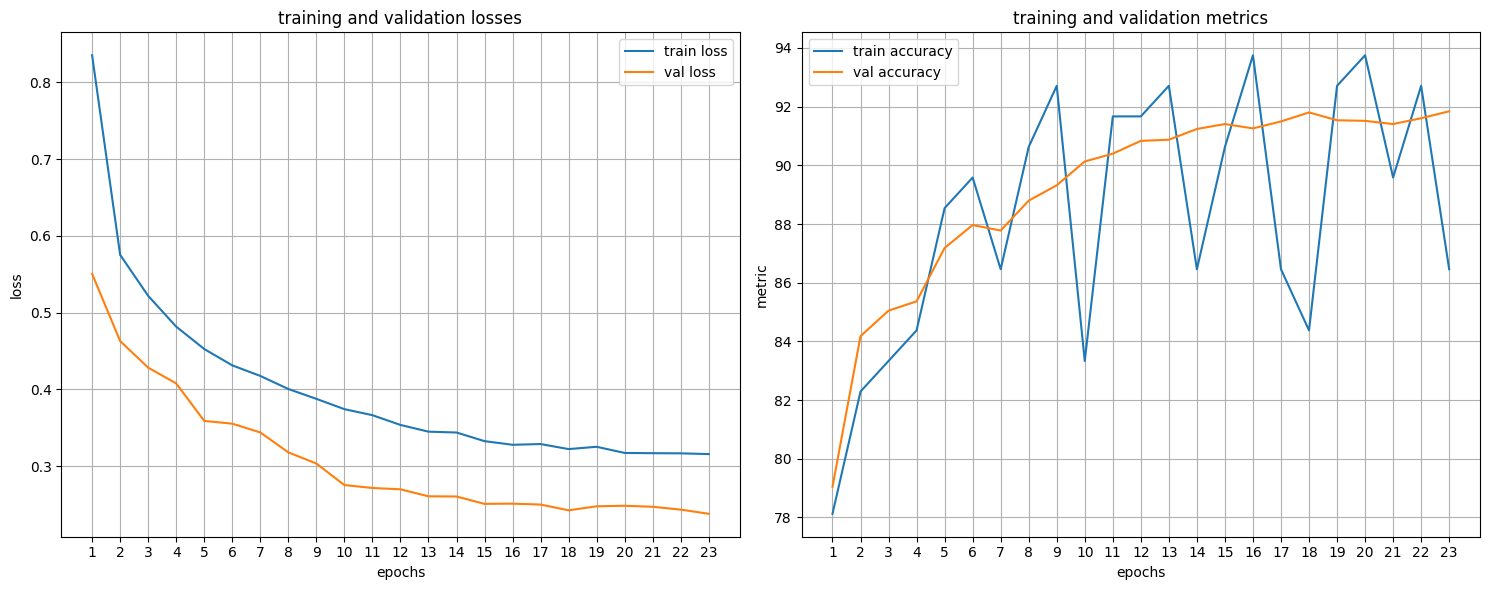

/home/gustaf/projects/deeplearning/utils/trainer.py:316: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self.early_stopping.best_model_p

In [15]:
import torch
import torch.nn as nn
from torch.optim import Adadelta
from torch.optim.lr_scheduler import StepLR
import sys
from pathlib import Path


#utils_dir = Path('/home/goose/projects/deeplearning/utils')
utils_dir = Path('/home/gustaf/projects/deeplearning/utils')
sys.path.append(str(utils_dir))
from metrics import precision, recall, f1_score
from trainer import ModelTrainer


# model
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()

        # conv layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(32)  # batch norm after first conv
        self.bn2 = nn.BatchNorm2d(64)  # batch norm after second conv
        self.bn3 = nn.BatchNorm2d(128)  # batch norm after third conv
        self.bn4 = nn.BatchNorm2d(256)  # batch norm after fourth conv
        # size calculation
        # 28x28 → conv1: 28x28
        # 28x28 → conv2: 28x28 → pool: 14x14
        # 14x14 → conv3: 14x14 → pool: 7x7
        # 7x7 → conv4: 7x7 → pool: 3x3
        # 3x3 → flatten: 3 * 3 * 256 = 2304
        flattened_size = 2304

        # fully connected layers
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(flattened_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_size)

        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        # conv1 + batch norm + pooling
        x = self.bn1(self.relu(self.conv1(x)))
        # conv2 + batch norm + pooling
        x = self.pool(self.bn2(self.relu(self.conv2(x))))
        # conv3 + batch norm + pooling
        x = self.pool(self.bn3(self.relu(self.conv3(x))))
        # conv4 + batch norm + pooling
        x = self.pool(self.bn4(self.relu(self.conv4(x))))
        x = self.dropout1(x)

        # flatten and fully connected layer
        x = self.flatten(x)
        x = self.fc(self.relu(x))
        x = self.dropout2(x)
        x = self.fc2(self.relu(x))
        x = self.fc3(x)

        return x

# initialize model
model = Net(input_size=28*28, output_size=10)
# initialize optimizer
optimizer = Adadelta(model.parameters(), lr=0.5, weight_decay=0.01)
# initialize scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.8)

# initialize trainer
trainer = ModelTrainer(
    model=model,
    device=device,
    loss_fn=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    scheduler=scheduler,
    batch_size=128,
    verbose=True,             # controls training progress logs
    verbose_details=True,     # controls hyperparameters and model summary logs
    enable_logging=True,      # controls overall logging
    save_metrics=True,        # controls saving of metrics visualization
    early_stopping_patience=5,
    early_stopping_delta=0.005,
    metrics=[ModelTrainer.accuracy]
)

# train model
trained_model = trainer.train(
    training_set=trainset,
    val_set=valset,
    num_epochs=100
)

Before normalization: mean: -0.4443073868751526, std: 0.6403351426124573
Using device: cuda


In [22]:
trainset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

[Epoch 01] Train Loss: 0.5536 | Val Loss: 0.4885 | accuracy: 82.74%
Validation loss decreased (inf --> 0.4885). Saving model.
[Epoch 02] Train Loss: 0.3883 | Val Loss: 0.3603 | accuracy: 87.10%
Validation loss decreased (0.4885 --> 0.3603). Saving model.
[Epoch 03] Train Loss: 0.3480 | Val Loss: 0.3309 | accuracy: 88.64%
Validation loss decreased (0.3603 --> 0.3309). Saving model.
[Epoch 04] Train Loss: 0.3232 | Val Loss: 0.2844 | accuracy: 89.93%
Validation loss decreased (0.3309 --> 0.2844). Saving model.
[Epoch 05] Train Loss: 0.2998 | Val Loss: 0.2813 | accuracy: 90.03%
Validation loss decreased (0.2844 --> 0.2813). Saving model.
[Epoch 06] Train Loss: 0.2811 | Val Loss: 0.2682 | accuracy: 90.62%
Validation loss decreased (0.2813 --> 0.2682). Saving model.
[Epoch 07] Train Loss: 0.2685 | Val Loss: 0.2374 | accuracy: 91.60%
Validation loss decreased (0.2682 --> 0.2374). Saving model.
[Epoch 08] Train Loss: 0.2505 | Val Loss: 0.2396 | accuracy: 91.74%
EarlyStopping counter: 1 out of 5
[Epoch 09] Train Loss: 0.2390 | Val Loss: 0.2382 | accuracy: 91.59%
EarlyStopping counter: 2 out of 5
[Epoch 10] Train Loss: 0.2270 | Val Loss: 0.2237 | accuracy: 92.24%
Validation loss decreased (0.2374 --> 0.2237). Saving model.
[Epoch 11] Train Loss: 0.2170 | Val Loss: 0.2178 | accuracy: 92.35%
Validation loss decreased (0.2237 --> 0.2178). Saving model.
[Epoch 12] Train Loss: 0.2095 | Val Loss: 0.2234 | accuracy: 92.25%
EarlyStopping counter: 1 out of 5
[Epoch 13] Train Loss: 0.2037 | Val Loss: 0.2138 | accuracy: 92.51%
Validation loss decreased (0.2178 --> 0.2138). Saving model.
[Epoch 14] Train Loss: 0.1934 | Val Loss: 0.2156 | accuracy: 92.52%
EarlyStopping counter: 1 out of 5
[Epoch 15] Train Loss: 0.1919 | Val Loss: 0.2135 | accuracy: 92.59%
EarlyStopping counter: 2 out of 5
[Epoch 16] Train Loss: 0.1866 | Val Loss: 0.2104 | accuracy: 92.84%
Validation loss decreased (0.2138 --> 0.2104). Saving model.
[Epoch 17] Train Loss: 0.1846 | Val Loss: 0.2105 | accuracy: 92.84%
EarlyStopping counter: 1 out of 5
[Epoch 18] Train Loss: 0.1803 | Val Loss: 0.2096 | accuracy: 92.83%
EarlyStopping counter: 2 out of 5
[Epoch 19] Train Loss: 0.1761 | Val Loss: 0.2101 | accuracy: 92.67%
EarlyStopping counter: 3 out of 5
[Epoch 20] Train Loss: 0.1737 | Val Loss: 0.2104 | accuracy: 92.74%
EarlyStopping counter: 4 out of 5

In [3]:
import sys
sys.path

['/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/home/gustaf/projects/deeplearning/venv/lib/python3.10/site-packages',
 '/tmp/tmpib4pb75e',
 '/home/gustaf/projects/deeplearning/utils']

In [4]:
print(type(1e-3))

<class 'float'>


In [5]:
print(type(0.001))

<class 'float'>
